# Find the income using Support Vector Machines!

__Adult Data Set__

From the link to adult.zip download the data set. First, take a look at the data. You can see
that the data contains categorical data as well. First of run a random forests and measure
your performance.

In [1]:
import os
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('adult.data',header=None,names=["Age", "Workclass", "Final_Weights", "Education",
                                                 "Education_Num", "Marital_Status", "Occupation", "Relationship",
                                                 "Race", "Sex", "Capital_Gain", "Capital_Loss",
                                                 "Hours_per_Week", "Country", "Income"
                                                ], dtype={'Age':'int64',
                                                         "Workclass":'category',
                                                         "Final_Weights":'int64',
                                                         "Education":'category',
                                                         "Education_Num":'int64', 
                                                         "Marital_Status":'category', 
                                                         "Occupation":"category", 
                                                         "Relationship":"category",
                                                         "Race":"category", 
                                                         "Sex":"category",
                                                         "Capital_Gain":"int64", 
                                                         "Capital_Loss":'int64',
                                                         "Hours_per_Week":'int64',  
                                                         "Country":'category', 
                                                         "Income":'category'
                                                         })

In [3]:
df.head(10)

,Age,Workclass,Final_Weights,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null category
Final_Weights     32561 non-null int64
Education         32561 non-null category
Education_Num     32561 non-null int64
Marital_Status    32561 non-null category
Occupation        32561 non-null category
Relationship      32561 non-null category
Race              32561 non-null category
Sex               32561 non-null category
Capital_Gain      32561 non-null int64
Capital_Loss      32561 non-null int64
Hours_per_Week    32561 non-null int64
Country           32561 non-null category
Income            32561 non-null category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


In [5]:
df.describe()

,Age,Final_Weights,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.Income.unique()

[<=50K, >50K]
Categories (2, object): [<=50K, >50K]

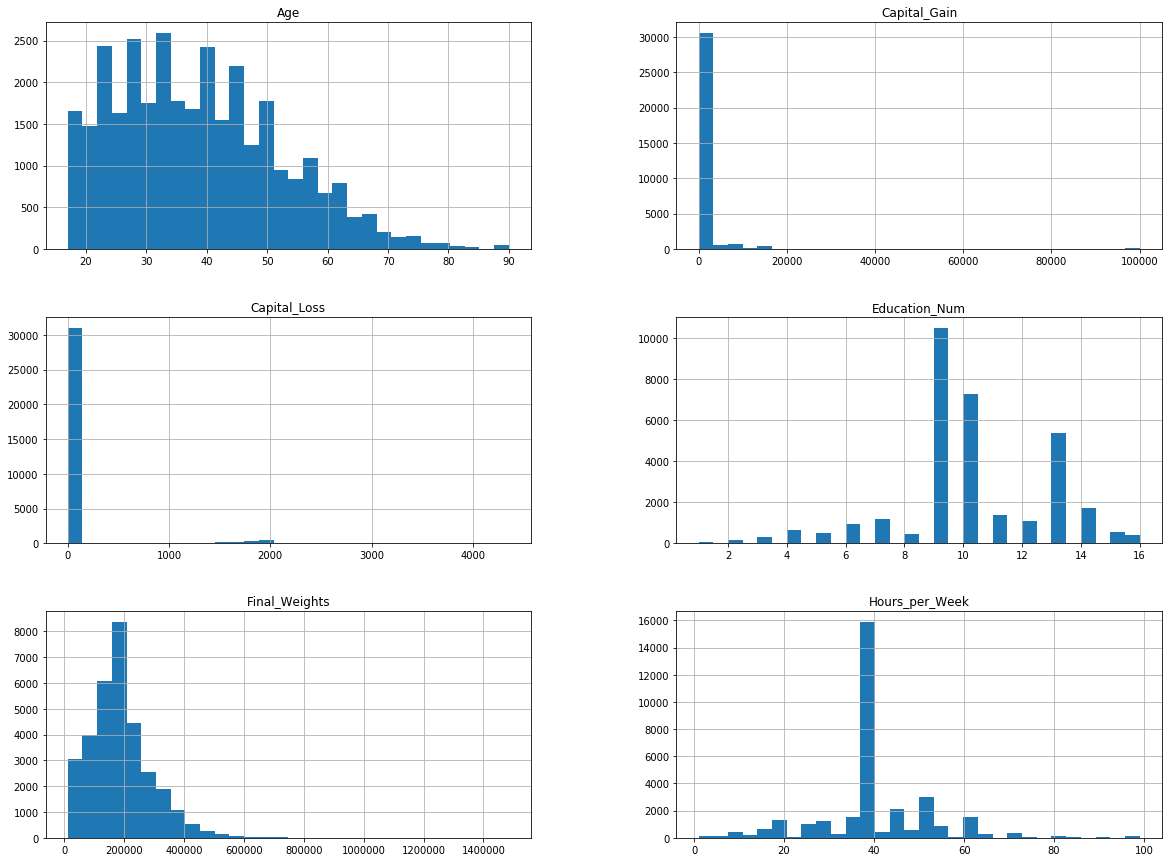

In [7]:
%matplotlib inline
df.hist(bins=30,figsize=(20,15))
plt.show()

__Transform Categorical data into numbers!__



__Now that we have more complicated algorithm, let’s make use out of them. But first you
should change your categori`cal data into real valued number which are needed for the SVM
algorithm. Come up with a method that can do this translation.__

In [8]:
#Using one hot encoder 

In [9]:
int_subset = df.select_dtypes('int64')
cat_subset = df.select_dtypes('category')

# One hot encode
cat_subset = pd.get_dummies(cat_subset[cat_subset.columns.drop("Income")])

In [10]:
df_final = pd.merge(int_subset,cat_subset,how='inner',left_index=True, right_index=True)

In [11]:
X = df_final.iloc[:, :]
y = df.iloc[:, 14]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 50)

## Feature Scaling

__Scale your attributes!
Now that you have numerical attributes, scale all your features to something reasonable.__

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

__Run Support Vector Machine!
Now that you preprocessed your data, you can run the algorithm and measure your performance. Compare your results to the random forest performance on the same task.__


## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
classifer = RandomForestClassifier()

In [16]:
classifer.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
y_pred = classifer.predict(X_test)

In [18]:
%matplotlib inline
#Making a Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac*100)


[[5781  412]
 [ 826 1122]]
84.79302297015109


## SVM

In [19]:
from sklearn.svm import SVC

In [21]:
svm_class = SVC(kernel = 'rbf')
svm_class.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
y_pred = svm_class.predict(X_test)

In [23]:
%matplotlib inline
#Making a Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac*100)


[[5814  379]
 [ 807 1141]]
85.43176513941776


Based on running these two algorithims, SVM performed better but the difference is not huge in comparison with Random Forest.